In [1]:
import pandas as pd
import numpy as np
import json

In [2]:
results = """
Camera v1
{'mae': 0.27153275613021877, 'rmse': 0.38624637618598856, 'max': 1.7149375548548547, 'failure_rate': 2.816812454605741, 'distance': 7315.052901123929, 'distance_per_intervention': 166.2512022982711, 'interventions': 44, 'whiteness': 41.360333291154326, 'cmd_whiteness': 109.99070489664071, 'expert_whiteness': 23.387318346549534}
Camera v2
{'mae': 0.2906035008268023, 'rmse': 0.3945015027452876, 'max': 1.6012950573699283, 'failure_rate': 3.3145858908841754, 'distance': 8182.546019124199, 'distance_per_intervention': 511.40912619526244, 'interventions': 16, 'whiteness': 27.272656997016664, 'cmd_whiteness': 58.912469477233415, 'expert_whiteness': 23.387318346549534}
Camera v3
{'mae': 0.25259475068591175, 'rmse': 0.3422365360856457, 'max': 1.7086771019286555, 'failure_rate': 1.5388568491977388, 'distance': 8220.317094216764, 'distance_per_intervention': 548.0211396144509, 'interventions': 15, 'whiteness': 35.41893688386236, 'cmd_whiteness': 94.09829760364649, 'expert_whiteness': 23.387318346549534}
Camera in train
{'mae': 0.2707389586595784, 'rmse': 0.4022488477100874, 'max': 1.7189517080682595, 'failure_rate': 4.829513379248052, 'distance': 8301.46969340704, 'distance_per_intervention': 830.146969340704, 'interventions': 10, 'whiteness': 28.364106549976444, 'cmd_whiteness': 68.15811765889585, 'expert_whiteness': 23.387318346549534}
Lidar v1
{'mae': 0.2164273510701372, 'rmse': 0.28794647831162357, 'max': 1.4814049216935727, 'failure_rate': 0.4200621692010418, 'distance': 8442.519560651908, 'distance_per_intervention': 2110.629890162977, 'interventions': 4, 'whiteness': 22.95757235057836, 'cmd_whiteness': 60.71982088365033, 'expert_whiteness': 22.923865138522743}
Lidar v2
{'mae': 0.23951848356004346, 'rmse': 0.32021653474413686, 'max': 1.410733995029802, 'failure_rate': 0.9813789632611978, 'distance': 8465.916553584271, 'distance_per_intervention': 2116.479138396068, 'interventions': 4, 'whiteness': 17.707242631777568, 'cmd_whiteness': 40.788217567179025, 'expert_whiteness': 22.923865138522743}
Lidar v3
{'mae': 0.2536249345345471, 'rmse': 0.3528786544085774, 'max': 1.6002952563202872, 'failure_rate': 2.1795842800639567, 'distance': 8432.327240726016, 'distance_per_intervention': 1686.465448145203, 'interventions': 5, 'whiteness': 18.841146974682626, 'cmd_whiteness': 56.74452412521819, 'expert_whiteness': 22.923865138522743}
Lidar in train
{'mae': 0.2598746390647679, 'rmse': 0.3802804511875996, 'max': 1.6692438325569796, 'failure_rate': 4.375209942895532, 'distance': 8436.864018329401, 'distance_per_intervention': 2812.2880061098003, 'interventions': 3, 'whiteness': 19.209361200653984, 'cmd_whiteness': 38.54266349696802, 'expert_whiteness': 22.923865138522743}
Lidar in train night
{'mae': 0.25314860436451386, 'rmse': 0.3459086938928751, 'max': 1.630496452339, 'failure_rate': 1.5185648727576135, 'distance': 8521.477898587687, 'distance_per_intervention': 2840.4926328625625, 'interventions': 3, 'whiteness': 21.52354723505918, 'cmd_whiteness': 67.14565934366986, 'expert_whiteness': 22.923865138522743}
Lidar night
{'mae': 0.23909138446324246, 'rmse': 0.32493206282364406, 'max': 1.659170327718653, 'failure_rate': 1.2672413793103448, 'distance': 8216.289369532735, 'distance_per_intervention': 684.6907807943945, 'interventions': 12, 'whiteness': 25.568653921414345, 'cmd_whiteness': 69.0679117344516, 'expert_whiteness': 22.923865138522743}
Lidar night #2
{'mae': 0.23140690498687244, 'rmse': 0.3148313254633656, 'max': 1.6218812651299235, 'failure_rate': 1.5501905972045744, 'distance': 8376.642020810223, 'distance_per_intervention': 1396.1070034683705, 'interventions': 6, 'whiteness': 20.270503405325538, 'cmd_whiteness': 49.14729491131972, 'expert_whiteness': 22.923865138522743}
Lidar all channels
{'mae': 0.21934381266983838, 'rmse': 0.31392314409302075, 'max': 1.6426648453005086, 'failure_rate': 1.968503937007874, 'distance': 8491.618679568586, 'distance_per_intervention': 2830.5395598561954, 'interventions': 3, 'whiteness': 19.17217743456574, 'cmd_whiteness': 33.89063165134626, 'expert_whiteness': 22.923865138522743}
Lidar intensity
{'mae': 0.3267694308573402, 'rmse': 0.4732339915443102, 'max': 1.6593815307920154, 'failure_rate': 7.01828292189738, 'distance': 8446.16604232979, 'distance_per_intervention': 2111.5415105824477, 'interventions': 4, 'whiteness': 23.961064265768467, 'cmd_whiteness': 53.783987250236294, 'expert_whiteness': 22.923865138522743}
Lidar range
{'mae': 0.6122139347238139, 'rmse': 0.7695435033217324, 'max': 1.6757036288168157, 'failure_rate': 19.954562665656947, 'distance': 1679.012717905246, 'distance_per_intervention': 76.31875990478392, 'interventions': 22, 'whiteness': 29.858233482499045, 'cmd_whiteness': 64.02717916493413, 'expert_whiteness': 22.923865138522743}
Lidar ambience
{'mae': 0.728352878106602, 'rmse': 0.8773714729402442, 'max': 1.7017581466320282, 'failure_rate': 17.49271137026239, 'distance': 329.4733138441798, 'distance_per_intervention': 17.340700728641043, 'interventions': 19, 'whiteness': 168.18447945397463, 'cmd_whiteness': 555.1688851900144, 'expert_whiteness': 22.923865138522743}
Lidar Winter v1
{'mae': 0.24077287766041175, 'rmse': 0.32074558957088006, 'max': 1.5369283242890857, 'failure_rate': 0.9426619389431808, 'distance': 8080.505297855708, 'distance_per_intervention': 404.0252648927854, 'interventions': 20, 'whiteness': 38.38490904517742, 'cmd_whiteness': 107.12677614094522, 'expert_whiteness': 22.923865138522743}
Lidar Winter v2
{'mae': 0.2971095664175751, 'rmse': 0.4105259810386456, 'max': 1.5934707554255736, 'failure_rate': 3.536532641591007, 'distance': 7980.378562030141, 'distance_per_intervention': 306.93763700115926, 'interventions': 26, 'whiteness': 37.597063418165874, 'cmd_whiteness': 118.53725563410337, 'expert_whiteness': 22.923865138522743}
Lidar Winter v3
{'mae': 0.256597960271629, 'rmse': 0.3449099860369303, 'max': 1.6163590616877834, 'failure_rate': 1.643884570713839, 'distance': 7698.891989550286, 'distance_per_intervention': 197.4074869115458, 'interventions': 39, 'whiteness': 42.15369836835372, 'cmd_whiteness': 145.37316860331046, 'expert_whiteness': 22.923865138522743}
Camera Winter v3
{'mae': 0.6709031794082014, 'rmse': 0.7560736076104017, 'max': 1.6011617574077084, 'failure_rate': 18.024079320113316, 'distance': 409.75425764088135, 'distance_per_intervention': 20.487712882044068, 'interventions': 20, 'whiteness': 112.37690900965556, 'cmd_whiteness': 350.0947727587105, 'expert_whiteness': 23.387318346549534}
Camera in train spring
{'mae': 0.26863010447092717, 'rmse': 0.3518893337472011, 'max': 1.434817416982681, 'failure_rate': 1.1079927498099749, 'distance': 8179.724421852396, 'distance_per_intervention': 371.80565553874527, 'interventions': 22, 'whiteness': 38.30655557506528, 'cmd_whiteness': 147.19676950421442, 'expert_whiteness': 23.387318346549534}
Lidar in train spring x517 y45
{'mae': 0.2593717706157698, 'rmse': 0.3576603026378822, 'max': 1.644597933468811, 'failure_rate': 2.0604642792873853, 'distance': 7929.405214567631, 'distance_per_intervention': 247.79391295523848, 'interventions': 32, 'whiteness': 36.83647156273202, 'cmd_whiteness': 77.79013419646932, 'expert_whiteness': 22.923865138522743}
Camera spring in train BGR
{'mae': 0.22824613661126283, 'rmse': 0.30492073976739653, 'max': 1.7214711163633547, 'failure_rate': 0.7025240002543074, 'distance': 7503.992827963117, 'distance_per_intervention': 121.03214238650189, 'interventions': 62, 'whiteness': 66.7421495146749, 'cmd_whiteness': 251.74333487148644, 'expert_whiteness': 23.387318346549534}
Camera spring RGB
{'mae': 0.22143046562881852, 'rmse': 0.30287035902974957, 'max': 1.6999216336869531, 'failure_rate': 1.3637743974822627, 'distance': 8577.185980837728, 'distance_per_intervention': 1715.4371961675456, 'interventions': 5, 'whiteness': 22.9258627266242, 'cmd_whiteness': 65.52660493067467, 'expert_whiteness': 23.387318346549534}
Camera spring BGR
{'mae': 0.2495125295043439, 'rmse': 0.33104150834292395, 'max': 1.7185212201583533, 'failure_rate': 1.0984956003406188, 'distance': 8425.506275510448, 'distance_per_intervention': 561.7004183673632, 'interventions': 15, 'whiteness': 47.46386744951902, 'cmd_whiteness': 103.93077928603464, 'expert_whiteness': 23.387318346549534}
Lidar in train spring x45 y517
{'mae': 0.2700355968460438, 'rmse': 0.36143422008680015, 'max': 1.4282909443039304, 'failure_rate': 1.3870125191389715, 'distance': 7974.4203143217255, 'distance_per_intervention': 284.8007255114902, 'interventions': 28, 'whiteness': 32.57966224335194, 'cmd_whiteness': 69.49777314287546, 'expert_whiteness': 22.923865138522743}
Camera v1 spring
{'mae': 0.22311987290708477, 'rmse': 0.2916234716113494, 'max': 1.1284150211130966, 'failure_rate': 0.31292783101897126, 'distance': 8513.729970711332, 'distance_per_intervention': 1702.7459941422665, 'interventions': 5, 'whiteness': 21.01400658472356, 'cmd_whiteness': 59.1655346542432, 'expert_whiteness': 23.387318346549534}
Camera in train spring
{'mae': 0.24525640421044248, 'rmse': 0.3291476438504756, 'max': 1.2536699163819658, 'failure_rate': 1.3851891315929674, 'distance': 8489.138533056424, 'distance_per_intervention': 2829.7128443521415, 'interventions': 3, 'whiteness': 23.0742793721048, 'cmd_whiteness': 65.94352651549603, 'expert_whiteness': 23.387318346549534}
Camera v1 spring
{'mae': 0.23088668332126538, 'rmse': 0.30444885103275254, 'max': 1.3838765496927377, 'failure_rate': 0.961781827385472, 'distance': 8464.334414890189, 'distance_per_intervention': 2116.083603722547, 'interventions': 4, 'whiteness': 24.62509993931149, 'cmd_whiteness': 65.02619290238128, 'expert_whiteness': 23.387318346549534}
Camera v2 spring
{'mae': 0.23823662499297601, 'rmse': 0.3130526038207709, 'max': 1.2721541136976486, 'failure_rate': 0.6917558642678205, 'distance': 8363.17488650764, 'distance_per_intervention': 1045.396860813455, 'interventions': 8, 'whiteness': 33.46032825076525, 'cmd_whiteness': 107.73348095698013, 'expert_whiteness': 23.387318346549534}
Camera v3 spring
{'mae': 0.2402807594393857, 'rmse': 0.3086952556841057, 'max': 1.1453249999323865, 'failure_rate': 0.6642254960401941, 'distance': 8389.87918022878, 'distance_per_intervention': 932.2087978031977, 'interventions': 9, 'whiteness': 29.698904637469028, 'cmd_whiteness': 67.55371029928838, 'expert_whiteness': 23.387318346549534}
Lidar in train spring
{'mae': 0.2782872055728993, 'rmse': 0.3985300247306396, 'max': 1.703291612247507, 'failure_rate': 4.693140794223827, 'distance': 7849.634993660165, 'distance_per_intervention': 560.6882138328689, 'interventions': 14, 'whiteness': 31.014602269963902, 'cmd_whiteness': 56.61873046111328, 'expert_whiteness': 22.923865138522743}
Lidar intensity spring
{'mae': 0.541552108109863, 'rmse': 0.6688344792113197, 'max': 1.6202249992994608, 'failure_rate': 11.96236559139785, 'distance': 560.9923056922557, 'distance_per_intervention': 93.49871761537595, 'interventions': 6, 'whiteness': 20.72496281502658, 'cmd_whiteness': 85.63000063278875, 'expert_whiteness': 22.923865138522743}
Lidar v2 spring
{'mae': 0.2672800372922616, 'rmse': 0.3803465468045318, 'max': 1.648004604098236, 'failure_rate': 3.515385289734373, 'distance': 8183.363123433743, 'distance_per_intervention': 389.68395825874967, 'interventions': 21, 'whiteness': 27.250510873446924, 'cmd_whiteness': 52.63703709643017, 'expert_whiteness': 22.923865138522743}
Lidar v1 spring
{'mae': 0.26488105713235705, 'rmse': 0.35241952402471255, 'max': 1.5981494596620012, 'failure_rate': 1.5172533379573436, 'distance': 8286.90086341141, 'distance_per_intervention': 517.9313039632132, 'interventions': 16, 'whiteness': 23.659726238390867, 'cmd_whiteness': 49.762369964646204, 'expert_whiteness': 22.923865138522743}
Lidar v3 spring
{'mae': 0.2786397040002252, 'rmse': 0.39344163616454214, 'max': 1.7227230374446738, 'failure_rate': 3.1959240389069015, 'distance': 7798.206328541252, 'distance_per_intervention': 199.95400842413468, 'interventions': 39, 'whiteness': 40.7326712862529, 'cmd_whiteness': 92.61248810552043, 'expert_whiteness': 22.923865138522743}
"""

In [3]:
results = results.split('\n')[1:-1]

In [4]:
len(results)

70

In [5]:
names = results[::2]
experiment_results = results[1::2]
foobar = list(zip(names, experiment_results))

In [6]:
metrics_df = pd.DataFrame(columns=["model", 'mae', 'rmse', 'max', 'failure_rate', 'distance', 'distance_per_intervention', 'interventions', 'whiteness', 'cmd_whiteness', 'expert_whiteness'])
for name, res in zip(names, experiment_results):
    res = json.loads(res.replace("'", '"'))
    metrics = pd.DataFrame(data=res, index=[0])
    metrics['model'] = name
    metrics_df = metrics_df.append(metrics, ignore_index=True)
metrics_df.set_index("model");
metrics_df = metrics_df[["model", 'mae', 'rmse', 'max', 'failure_rate', 'distance', 'distance_per_intervention', 'interventions', 'whiteness', 'cmd_whiteness', 'expert_whiteness']]
metrics_df

/tmp/ipykernel_2168932/2630504245.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append(metrics, ignore_index=True)
/tmp/ipykernel_2168932/2630504245.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append(metrics, ignore_index=True)
/tmp/ipykernel_2168932/2630504245.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append(metrics, ignore_index=True)
/tmp/ipykernel_2168932/2630504245.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append(metrics, ignore_index=True)
/tmp/ipykernel_2168932/2630504245.py:6: FutureWarning: The frame

,model,mae,rmse,max,failure_rate,distance,distance_per_intervention,interventions,whiteness,cmd_whiteness,expert_whiteness
0,Camera v1,0.271533,0.386246,1.714938,2.816812,7315.052901,166.251202,44,41.360333,109.990705,23.387318
1,Camera v2,0.290604,0.394502,1.601295,3.314586,8182.546019,511.409126,16,27.272657,58.912469,23.387318
2,Camera v3,0.252595,0.342237,1.708677,1.538857,8220.317094,548.02114,15,35.418937,94.098298,23.387318
3,Camera in train,0.270739,0.402249,1.718952,4.829513,8301.469693,830.146969,10,28.364107,68.158118,23.387318
4,Lidar v1,0.216427,0.287946,1.481405,0.420062,8442.519561,2110.62989,4,22.957572,60.719821,22.923865
5,Lidar v2,0.239518,0.320217,1.410734,0.981379,8465.916554,2116.479138,4,17.707243,40.788218,22.923865
6,Lidar v3,0.253625,0.352879,1.600295,2.179584,8432.327241,1686.465448,5,18.841147,56.744524,22.923865
7,Lidar in train,0.259875,0.38028,1.669244,4.37521,8436.864018,2812.288006,3,19.209361,38.542663,22.923865
8,Lidar in train night,0.253149,0.345909,1.630496,1.518565,8521.477899,2840.492633,3,21.523547,67.145659,22.923865
9,Lidar night,0.239091,0.324932,1.65917,1.267241,8216.28937,684.690781,12,25.568654,69.067912,22.923865


In [7]:
metrics_df.insert(10, 'ol_whiteness', [185.125, 178.047, 182.087, 175.871, 
                                       299.047/3, 91.736, 105.052, 212.866/3, 
                                       212.866/3, 105.052, 105.052, 
                                       105.052, 409.752/3, 282.114/3, 354.94/3,
                                299.047/3, 91.736, 105.052, 178.047, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

metrics_df.insert(11, 'ol_season_whiteness', [177.875, 160.330, 162.604, 164.991,
                                108.563, 97.656, 107.233, 81.347,
                                81.347, 107.233, 107.233,
                                107.233, 111.384, 101.421, 204.356,
                                400.582, 462.965, 370.778, 483.575, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

metrics_df.insert(12, 'ol_mae', [8.075, 8.196, 8.526, 6.787,
                                 7.944, 8.223, 8.132, 6.299,
                                 6.299, 8.132, 8.132,
                                 8.132, 7.547, 11.102, 12.570,
                                 43.140, 58.815, 32.979, 38.555, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [8]:
metrics_df["interventions"] = [11, 11, 12, 7, 2, 2, 3, 0, 1, 8, 3, 0, 2, 22, 19, 19, 22, 34, 20, 
                                     22, 32, 62, 5, 15, 28, 5, 3, 4, 8, 9, 14, 6, 21, 16, 39]
#metrics_df["distance_per_intervention"] = metrics_df["distance"] / metrics_df["interventions"]
metrics_df["distance_per_intervention"] = metrics_df.apply(lambda x: x['distance']/x['interventions'] if x['interventions'] != 0 else x['distance'], axis=1)

In [9]:
metrics_df

,model,mae,rmse,max,failure_rate,distance,distance_per_intervention,interventions,whiteness,cmd_whiteness,ol_whiteness,ol_season_whiteness,ol_mae,expert_whiteness
0,Camera v1,0.271533,0.386246,1.714938,2.816812,7315.052901,665.004809,11,41.360333,109.990705,185.125000,177.875,8.075,23.387318
1,Camera v2,0.290604,0.394502,1.601295,3.314586,8182.546019,743.867820,11,27.272657,58.912469,178.047000,160.330,8.196,23.387318
2,Camera v3,0.252595,0.342237,1.708677,1.538857,8220.317094,685.026425,12,35.418937,94.098298,182.087000,162.604,8.526,23.387318
3,Camera in train,0.270739,0.402249,1.718952,4.829513,8301.469693,1185.924242,7,28.364107,68.158118,175.871000,164.991,6.787,23.387318
4,Lidar v1,0.216427,0.287946,1.481405,0.420062,8442.519561,4221.259780,2,22.957572,60.719821,99.682333,108.563,7.944,22.923865
5,Lidar v2,0.239518,0.320217,1.410734,0.981379,8465.916554,4232.958277,2,17.707243,40.788218,91.736000,97.656,8.223,22.923865
6,Lidar v3,0.253625,0.352879,1.600295,2.179584,8432.327241,2810.775747,3,18.841147,56.744524,105.052000,107.233,8.132,22.923865
7,Lidar in train,0.259875,0.38028,1.669244,4.37521,8436.864018,8436.864018,0,19.209361,38.542663,70.955333,81.347,6.299,22.923865
8,Lidar in train night,0.253149,0.345909,1.630496,1.518565,8521.477899,8521.477899,1,21.523547,67.145659,70.955333,81.347,6.299,22.923865
9,Lidar night,0.239091,0.324932,1.65917,1.267241,8216.28937,1027.036171,8,25.568654,69.067912,105.052000,107.233,8.132,22.923865


In [10]:
metrics_df.rename(columns={'whiteness': 'cl_whiteness'}, inplace=True)
metrics_df.rename(columns={'cmd_whiteness': 'cl_cmd_whiteness'}, inplace=True)
metrics_df.rename(columns={'mae': 'cl_mae'}, inplace=True)

In [11]:
metrics_df = metrics_df.astype({"interventions": float})

In [12]:
#metrics_df.drop([13, 14, 18], inplace=True)

In [13]:
metrics_df.drop(['rmse', 'max', 'distance', 'expert_whiteness'], axis=1, inplace=True)

In [14]:
metrics_df.style.format({
    'cl_mae': "{:.4f}m",
    'rmse': "{:.4f}m",
    'max': "{:.4f}m",
    'failure_rate': "{:.2f}%",
    'interventions': "{:.0f}",
    'cl_whiteness': "{:.2f}°/s",
    'ol_whiteness': "{:.2f}°/s",
    'cl_cmd_whiteness': "{:.2f}°/s",
    'ol_season_whiteness': "{:.2f}°/s",
    'ol_mae': "{:.2f}°",
    'distance': "{:.2f}m",
    'distance_per_intervention': "{:.2f}m"
})

,model,cl_mae,failure_rate,distance_per_intervention,interventions,cl_whiteness,cl_cmd_whiteness,ol_whiteness,ol_season_whiteness,ol_mae
0,Camera v1,0.2715m,2.82%,665.00m,11,41.36°/s,109.99°/s,185.12°/s,177.88°/s,8.07°
1,Camera v2,0.2906m,3.31%,743.87m,11,27.27°/s,58.91°/s,178.05°/s,160.33°/s,8.20°
2,Camera v3,0.2526m,1.54%,685.03m,12,35.42°/s,94.10°/s,182.09°/s,162.60°/s,8.53°
3,Camera in train,0.2707m,4.83%,1185.92m,7,28.36°/s,68.16°/s,175.87°/s,164.99°/s,6.79°
4,Lidar v1,0.2164m,0.42%,4221.26m,2,22.96°/s,60.72°/s,99.68°/s,108.56°/s,7.94°
5,Lidar v2,0.2395m,0.98%,4232.96m,2,17.71°/s,40.79°/s,91.74°/s,97.66°/s,8.22°
6,Lidar v3,0.2536m,2.18%,2810.78m,3,18.84°/s,56.74°/s,105.05°/s,107.23°/s,8.13°
7,Lidar in train,0.2599m,4.38%,8436.86m,0,19.21°/s,38.54°/s,70.96°/s,81.35°/s,6.30°
8,Lidar in train night,0.2531m,1.52%,8521.48m,1,21.52°/s,67.15°/s,70.96°/s,81.35°/s,6.30°
9,Lidar night,0.2391m,1.27%,1027.04m,8,25.57°/s,69.07°/s,105.05°/s,107.23°/s,8.13°


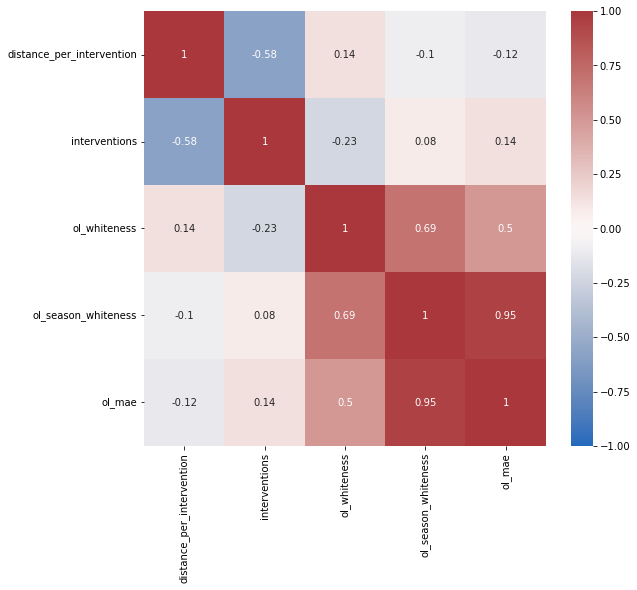

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 8))
corr_mat = metrics_df.corr().round(2)
sns.heatmap(corr_mat, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')
plt.show()

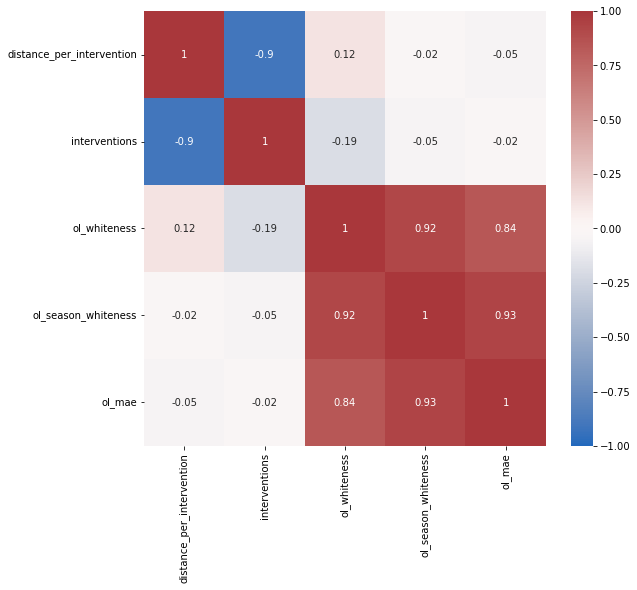

In [16]:
sp_corr_mat = metrics_df.corr(method="spearman").round(2)
plt.figure(figsize=(9, 8))
sns.heatmap(sp_corr_mat, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')
plt.show()

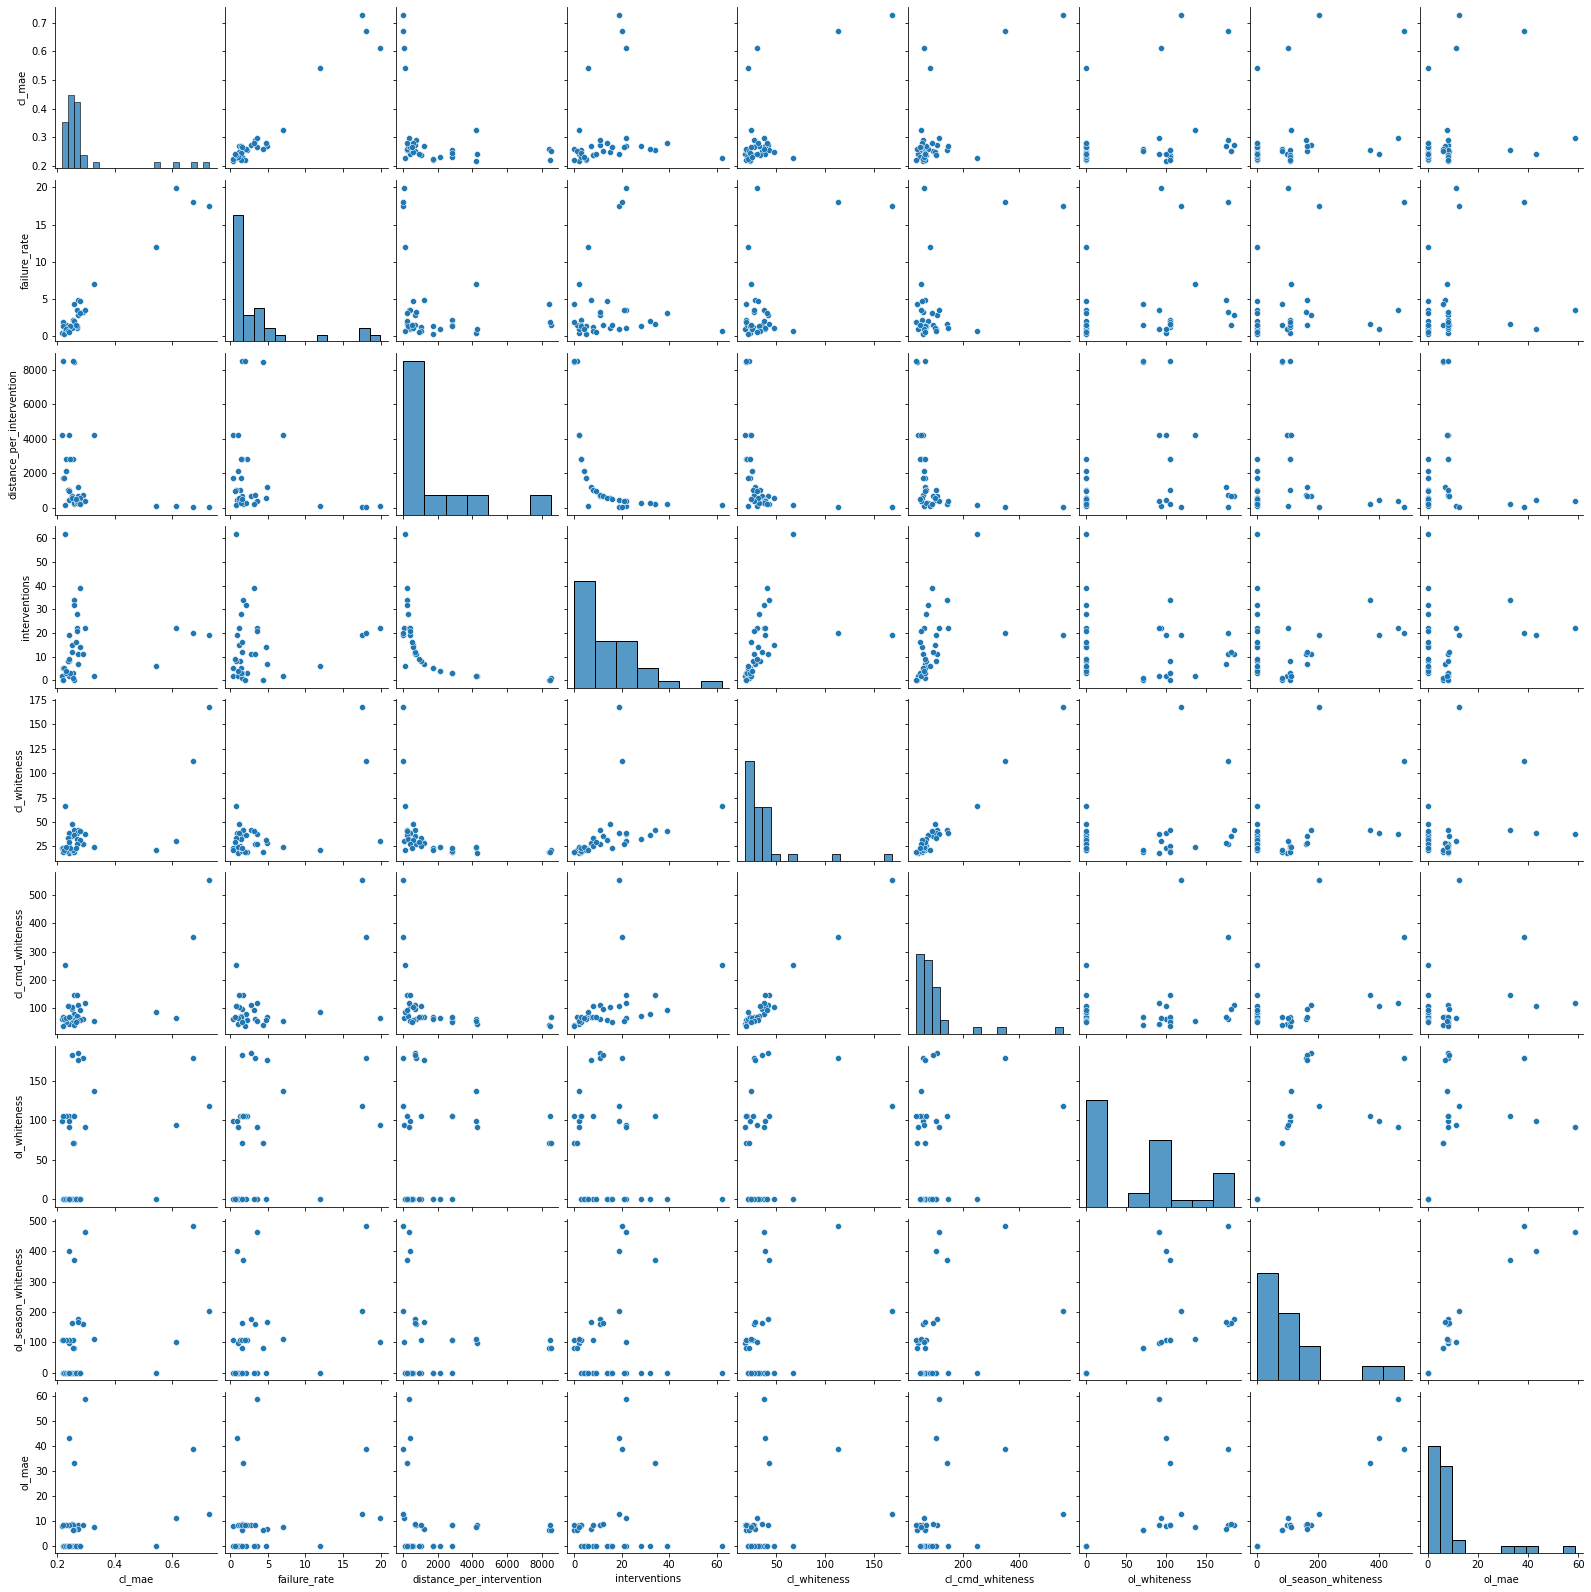

In [17]:
#sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
#sns.set(rc={'figure.facecolor':'white'})
sns.pairplot(metrics_df)
plt.savefig('metrics_pairwise.png', facecolor="white", edgecolor="none", transparent=False)

/home/romet/miniconda3/envs/e2e/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


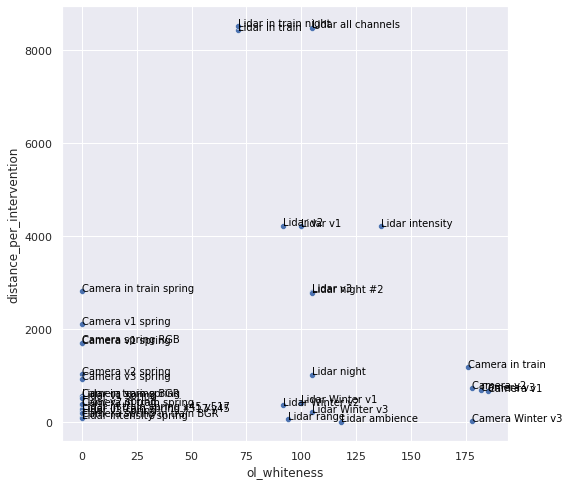

In [18]:
sns.set(rc = {'figure.figsize':(8,8), 'figure.facecolor':'white'})
sc_plot = sns.scatterplot(metrics_df['ol_whiteness'], metrics_df['distance_per_intervention'])

for line in range(0, metrics_df.shape[0]):
     sc_plot.text(metrics_df.ol_whiteness[line]+0.01, metrics_df.distance_per_intervention[line], 
     metrics_df.model[line], horizontalalignment='left', 
     size='small', color='black')

/home/romet/miniconda3/envs/e2e/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


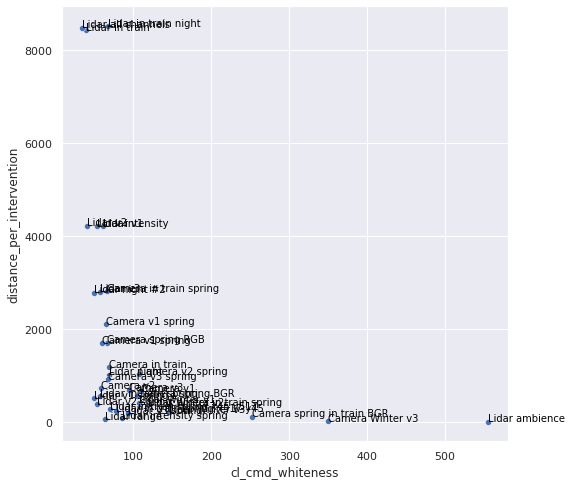

In [19]:
sns.set(rc = {'figure.figsize':(8,8), 'figure.facecolor':'white'})
sc_plot = sns.scatterplot(metrics_df['cl_cmd_whiteness'], metrics_df['distance_per_intervention'])
#sns.regplot(x="closed_loop_whiteness", y="distance_per_intervention", data=metrics_df, order=2, ci=None)

for line in range(0, metrics_df.shape[0]):
     sc_plot.text(metrics_df.cl_cmd_whiteness[line]+0.01, metrics_df.distance_per_intervention[line], 
     metrics_df.model[line], horizontalalignment='left', 
     size='small', color='black')

/home/romet/miniconda3/envs/e2e/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


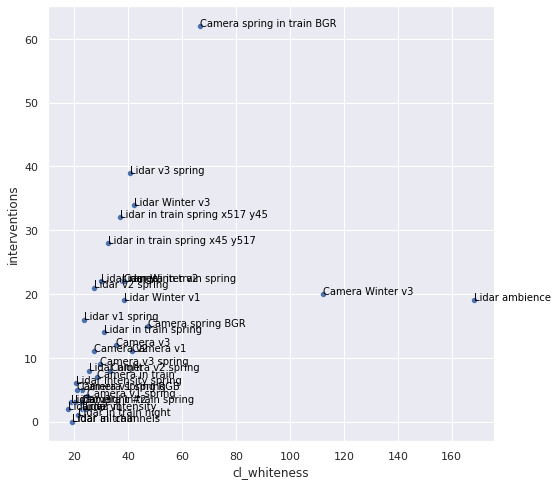

In [20]:
sns.set(rc = {'figure.figsize':(8,8), 'figure.facecolor':'white'})
sc_plot = sns.scatterplot(metrics_df['cl_whiteness'], metrics_df['interventions'])
#sns.regplot(x="closed_loop_whiteness", y="interventions", data=metrics_df, order=1, ci=None)

for line in range(0, metrics_df.shape[0]):
     sc_plot.text(metrics_df.cl_whiteness[line]+0.01, metrics_df.interventions[line], 
     metrics_df.model[line], horizontalalignment='left', 
     size='small', color='black')